In [1]:
# import cProfile
# import collections
# import datetime

import os
# import sys
# import time

# import numpy as np
import pandas as pd

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

# from datetime import datetime
# from dotenv import load_dotenv

from sklearn.model_selection import train_test_split, cross_validate, learning_curve, GridSearchCV, RandomizedSearchCV, GridSearchCV

import gc

pd.options.display.float_format = "{:.2f}".format
# plt.rcParams.update({'font.size': 18})
format = '%d/%m/%Y %H:%M'

# 3. Exploratory data analysis

Load all data required.

In [2]:
# Concatenate all playlists
data_path = os.getcwd() + '\\data\\external\\raw_3_playlists_dict.pkl'
txt = 'All playlists as dictionary - ' + data_path
if os.path.exists(data_path):
    print('Loaded: ' + txt)
    with open(data_path, 'rb') as f:
        playlists_dict = pickle.load(f)
else:
    print('File not found: ' + txt)
print(len(playlists_dict))

Loaded: All playlists as dictionary - C:\Users\map_f\OneDrive\Documents\GitHub\Follow_the_beat\data\external\raw_3_playlists_dict.pkl
1851


## Functions to create dictionaries

### Tracks

### Artists

In [4]:
gc.collect();

def dict_all_artists(path,df):
    # All artists
    data_path = path
#     data_path = os.getcwd() + path
    txt = 'All artists as a dictionary - ' + path

    if os.path.exists(data_path):
        print('Loaded: ' + txt)
        with open(data_path, 'rb') as f:
            artists_dict = pickle.load(f)
    else:
        # Extract the user and playlist IDs
        if type(df) is not dict:
            playlists_dict = df.to_dict('index')
        else:
            playlists_dict = df
        artists_dict = {}
        for i, pid in enumerate(playlists_dict):
            pl = playlists_dict.get(pid)
            for j, tr in enumerate(pl['tracks']):
                for k, art in enumerate(tr['artists']):
                    aid = art['id']
                    if aid not in artists_dict.keys():
                        art['in_playlist'] = [pid]
                        artists_dict.update({aid: art})
                    else:
                        curr_artist = artists_dict.get(aid)
    #                     if stop ==1:
    #                         print(pid, tr, aid, curr_artist)
    #                     stop = 2
                        curr_in_playlist = curr_artist['in_playlist'].copy()
                        curr_in_playlist.append(pid)
                        art['in_playlist'] = curr_in_playlist
                        artists_dict.update({aid: art})

        print('Saved: ' + txt)
        with open(data_path, 'wb') as f:
            pickle.dump(artists_dict, f)
            
        return artists_dict

    print(len(artists_dict))
    # artists_dict

### Albums

In [5]:
gc.collect();

def dict_all_albums(path,df):
    # All albums
#     data_path = os.getcwd() + path
    data_path = path
    txt = 'All albums as a dictionary - ' + data_path

    if os.path.exists(data_path):
        print('Loaded: ' + txt)
        with open(data_path, 'rb') as f:
            albums_dict = pickle.load(f)
    else:

        # Extract the user and playlist IDs
        if type(df) is not dict:
            playlists_dict = df.to_dict('index')
        else:
            playlists_dict = df
        albums_dict = {}
        for i, pid in enumerate(playlists_dict):
            pl = playlists_dict.get(pid)
            for j, tr in enumerate(pl['tracks']):
                alb = tr['album']
                aid = alb['id']
                if aid not in albums_dict.keys():
                    alb['in_playlist'] = [pid]
                    albums_dict.update({aid: alb})
                else:
                    curr_album = albums_dict.get(aid)
                    curr_in_playlist = curr_album['in_playlist'].copy()
                    curr_in_playlist.append(pid)
                    alb['in_playlist'] = curr_in_playlist
                    albums_dict.update({aid: alb})

        print('Saved: ' + txt)
        with open(data_path, 'wb') as f:
            pickle.dump(albums_dict, f)
        
        return albums_dict

    print(len(albums_dict))
    # albums_dict

## EDA

In [6]:
# All tracks
data_path = os.getcwd() + '\\data\\processed\\4_tracks_dict.pkl'
txt = 'All tracks as a dictionary - ' + data_path

if os.path.exists(data_path):
    print('Loaded: ' + txt)
    with open(data_path, 'rb') as f:
        tracks_dict = pickle.load(f)
else:
#     print('File not found: ' + txt)
    tracks_dict = dict_all_tracks(data_path,playlists_dict)

print(len(tracks_dict))

Loaded: All tracks as a dictionary - C:\Users\map_f\OneDrive\Documents\GitHub\Follow_the_beat\data\processed\4_tracks_dict.pkl
85458


In [7]:
# All artists
data_path = os.getcwd() + '\\data\\processed\\5_artists_dict.pkl'
txt = 'All artists as a dictionary - ' + data_path

if os.path.exists(data_path):
    print('Loaded: ' + txt)
    with open(data_path, 'rb') as f:
        artists_dict = pickle.load(f)
else:
#     print('File not found: ' + txt)
    artists_dict = dict_all_artists(data_path,playlists_dict)
    
print(len(artists_dict))

Loaded: All artists as a dictionary - C:\Users\map_f\OneDrive\Documents\GitHub\Follow_the_beat\data\processed\5_artists_dict.pkl
28669


In [8]:
# All albums
data_path = os.getcwd() + '\\data\\processed\\6_albums_dict.pkl'
txt = 'All albums as a dictionary - ' + data_path

if os.path.exists(data_path):
    print('Loaded: ' + txt)
    with open(data_path, 'rb') as f:
        albums_dict = pickle.load(f)
else:
#     print('File not found: ' + txt)
    albums_dict = dict_all_albums(data_path,playlists_dict)
print(len(albums_dict))

Loaded: All albums as a dictionary - C:\Users\map_f\OneDrive\Documents\GitHub\Follow_the_beat\data\processed\6_albums_dict.pkl
62095


##### Create data frames to perform EDA

In [9]:
gc.collect();

df_playlists = pd.DataFrame.from_dict(playlists_dict)
df_playlists = df_playlists.T

df_tracks = pd.DataFrame.from_dict(tracks_dict)
df_tracks = df_tracks.T

df_artists = pd.DataFrame.from_dict(artists_dict)
df_artists = df_artists.T

df_albums = pd.DataFrame.from_dict(albums_dict)
df_albums = df_albums.T

## 3.1 Overall metrics

In [10]:
total_playlists = len(playlists_dict)

# total_tracks = 0
# max_tracks = 0
# min_tracks = 9999999
# for i, item in enumerate(playlists_dict):
#     pl = playlists_dict[item]
#     total_tracks = total_tracks + pl['total_tracks']
#     if pl['total_tracks'] > max_tracks:
#         max_tracks = pl['total_tracks']
#     if pl['total_tracks'] < min_tracks and pl['total_tracks'] > 0:
#         min_tracks = pl['total_tracks']

total_tracks= df_playlists['total_tracks'].sum()
mean_tracks = df_playlists['total_tracks'].mean()
median_tracks = df_playlists['total_tracks'].median()
max_tracks = df_playlists['total_tracks'].max()
min_tracks = df_playlists['total_tracks'].min()

total_tracks_unique = len(tracks_dict)
total_artists = len(artists_dict)
total_albums = len(albums_dict)

In [11]:
# print("Total score for %s is %s" % (name, score))
txt = """
Total playlists: {total_playlists:,}
Total tracks: {total_tracks:,}
Total unique tracks: {total_tracks_unique:,}
Total artists: {total_artists:,}
Total albums: {total_albums:,}

Total track / unique: {ratio_total_unique:.1f}

Average number of tracks per playlist: {mean_tracks:.1f}
Median tracks per playlist: {median_tracks:.1f}
Maximum number of tracks per playlist: {max_tracks:,}
Minimum number of tracks per playlist: {min_tracks:,}

Artists/playlist: {artists_playlist:.1f}
Albums/playlist: {albums_playlist:.1f}

Albums/Artist: {albums_artist:.1f}
""".format(total_playlists=total_playlists,
           total_tracks_unique=total_tracks_unique,
           mean_tracks=mean_tracks,
           median_tracks=median_tracks,
           max_tracks = max_tracks,
           min_tracks = min_tracks,
           total_tracks=total_tracks,
           ratio_total_unique=total_tracks/total_tracks_unique,
           total_artists=total_artists,
           artists_playlist=total_artists/total_playlists,
           total_albums=total_albums,
           albums_playlist=total_albums/total_playlists,
           albums_artist=total_albums/total_artists
          )

print(txt)


Total playlists: 1,851
Total tracks: 140,248
Total unique tracks: 85,458
Total artists: 28,669
Total albums: 62,095

Total track / unique: 1.6

Average number of tracks per playlist: 75.8
Median tracks per playlist: 98.0
Maximum number of tracks per playlist: 100
Minimum number of tracks per playlist: 0

Artists/playlist: 15.5
Albums/playlist: 33.5

Albums/Artist: 2.2



### 3.2 Number of tracks per playlist

''

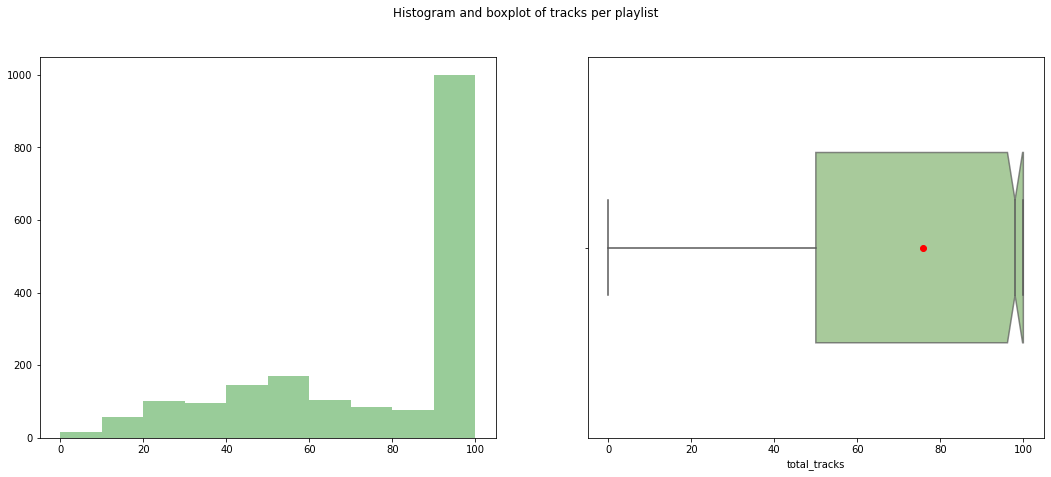

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 7))
fig.suptitle('Histogram and boxplot of tracks per playlist')

df = df_playlists
param = 'total_tracks'

axes[0].hist(df[param],
                    color='green',
                    alpha=0.4,
                    label='Artist count')

sns.boxplot(ax=axes[1],
        data=df,
        x=param,
        palette='summer_r',
        showmeans=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "red",
            "markeredgecolor": "red"
        },
        flierprops=dict(marker='.',
                        markerfacecolor='steelblue',
                        markeredgecolor='steelblue',
                        alpha=.5),
        boxprops=dict(alpha=.7),
        width=.5,
        notch=True)
;

In [13]:
print(df_playlists[df_playlists['total_tracks'] < 20]['playlist_id'].count())
print(df_playlists[df_playlists['total_tracks'] < 20]['playlist_id'].count() / total_playlists)

75
0.04051863857374392


In [14]:
print(df_playlists[df_playlists['total_tracks'] == 100]['playlist_id'].count())
print(df_playlists[df_playlists['total_tracks'] == 100]['playlist_id'].count() / total_playlists)

892
0.48190167477039436


- 48% of the playlists have 100 tracks
- only 4% have less than 20 tracks, so we will remove these playlists from our analysis

## 3.4 Artists distribution

In [15]:
df_artists['count'] = df_artists.in_playlist.str.len()
df_artists = df_artists.sort_values(by='count', ascending=False)
df_artists.head()

,id,name,in_playlist,count
0LyfQWJT6nXafLPZqxe9Of,0LyfQWJT6nXafLPZqxe9Of,Various Artists,"[10JQCfaJKfY9LQah8iFAiJ, 10JQCfaJKfY9LQah8iFAi...",4443
3TVXtAsR1Inumwj472S9r4,3TVXtAsR1Inumwj472S9r4,Drake,"[3v710gnfGEv6w83ogpB6cY, 6sscVoDWSQD4mBiClcnDo...",877
1uNFoZAHBGtllmzznpCI3s,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,"[2dbL1KoWphbT4uZKOgnnKw, 36gUYaCXYmKJ5FQCjRGXO...",754
3Nrfpe0tUJi4K4DXYWgMUX,3Nrfpe0tUJi4K4DXYWgMUX,BTS,"[2dbL1KoWphbT4uZKOgnnKw, 2dbL1KoWphbT4uZKOgnnK...",727
66CXWjxzNUsdJxJ2JdwvnR,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,"[3v710gnfGEv6w83ogpB6cY, 3NWlcmwxDe3viSgLh0Uya...",709


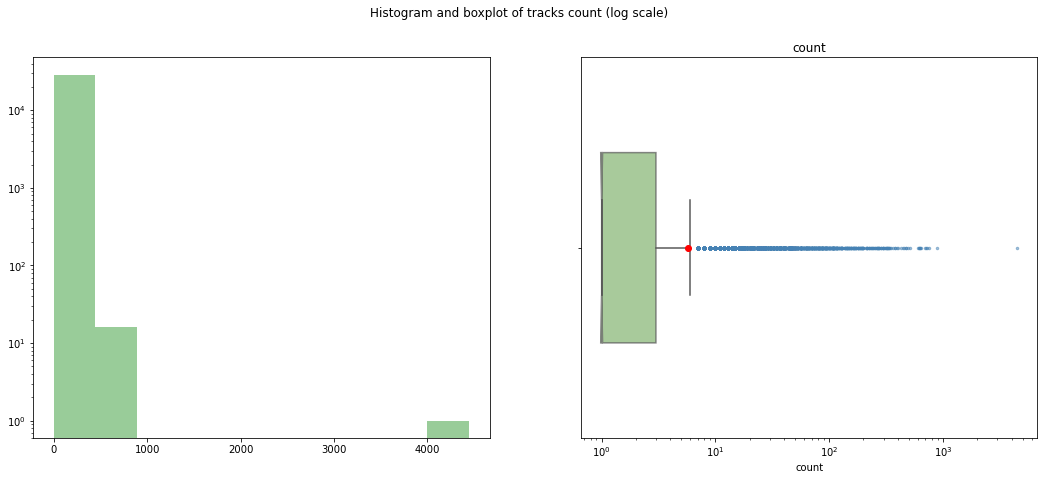

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 7))
fig.suptitle('Histogram and boxplot of tracks count (log scale)')

df = df_artists
param = 'count'

axes[0].hist(df[param],
                    color='green',
                    alpha=0.4,
                    label='Artist count')
axes[0].set_yscale('log')

sns.boxplot(ax=axes[1],
        data=df,
        x=param,
        palette='summer_r',
        showmeans=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "red",
            "markeredgecolor": "red"
        },
        flierprops=dict(marker='.',
                        markerfacecolor='steelblue',
                        markeredgecolor='steelblue',
                        alpha=.5),
        boxprops=dict(alpha=.7),
        width=.5,
        notch=True).set_title(param)
axes[1].set_xscale('log')

In [17]:
print(df_artists[df_artists['count']==1]['id'].count())
print(df_artists[df_artists['count']==1]['id'].count() / df_artists['id'].count())

15609
0.5444556838396875


- Various Artists is the "artist" most common, however "Various artists" is not a relevant information
- Drake is present in 877 playlists
- 15,609 artists (54.4%) appeared only one time

## 3.4 Albums distribution

In [18]:
df_albums.head()
df_albums['count'] = df_albums.in_playlist.str.len()
df_albums = df_albums.sort_values(by='count', ascending=False)
df_albums.head()

,id,name,release_date,in_playlist,count
6trNtQUgC8cgbWcqoMYkOR,6trNtQUgC8cgbWcqoMYkOR,beerbongs & bentleys,2018-04-27,"[4jwLkSVrnathscvWtxy1Fa, 4jwLkSVrnathscvWtxy1F...",250
7xV2TzoaVc0ycW7fwBwAml,7xV2TzoaVc0ycW7fwBwAml,Fine Line,2019-12-13,"[3v710gnfGEv6w83ogpB6cY, 3v710gnfGEv6w83ogpB6c...",189
0S0KGZnfBGSIssfF54WSJh,0S0KGZnfBGSIssfF54WSJh,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,"[2dbL1KoWphbT4uZKOgnnKw, 6sscVoDWSQD4mBiClcnDo...",188
41GuZcammIkupMPKH2OJ6I,41GuZcammIkupMPKH2OJ6I,ASTROWORLD,2018-08-03,"[3o0YWwdt1uNsb27RsMF1NP, 0x8L3xUxvSyIMRYnYkiV0...",165
5vP4U51csPrxPEaTLeHwU3,5vP4U51csPrxPEaTLeHwU3,A State Of Trance Year Mix 2020 (Mixed by Armi...,2020-12-11,"[03qHGkbjrYxLccWJVPjmMu, 03qHGkbjrYxLccWJVPjmM...",165


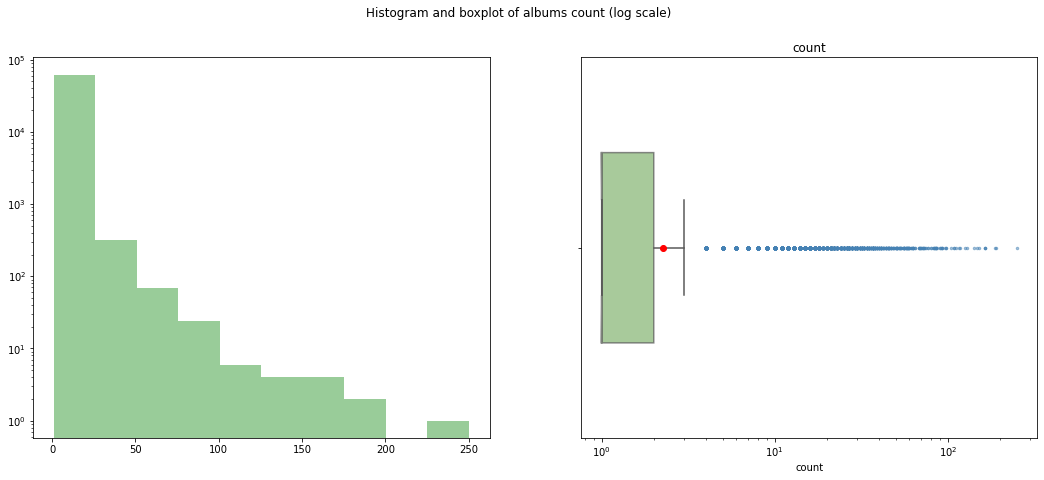

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 7))
fig.suptitle('Histogram and boxplot of albums count (log scale)')

df = df_albums
param = 'count'

axes[0].hist(df[param],
                    color='green',
                    alpha=0.4,
                    label='Artist count')
axes[0].set_yscale('log')

sns.boxplot(ax=axes[1],
        data=df,
        x=param,
        palette='summer_r',
        showmeans=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "red",
            "markeredgecolor": "red"
        },
        flierprops=dict(marker='.',
                        markerfacecolor='steelblue',
                        markeredgecolor='steelblue',
                        alpha=.5),
        boxprops=dict(alpha=.7),
        width=.5,
        notch=True).set_title(param)
axes[1].set_xscale('log')

In [20]:
print(df_albums[df_albums['count']==1]['id'].count())
print(df_albums[df_albums['count']==1]['id'].count() / df_albums['id'].count())

43355
0.6982043642805379


- beerbongs & bentleys is the album that appeared in most playlists with 250 appearances
- 43,355 albums (69.8%) appeared only one time

## 3.4 EDA recap and conclusions

In [21]:
print(txt)


Total playlists: 1,851
Total tracks: 140,248
Total unique tracks: 85,458
Total artists: 28,669
Total albums: 62,095

Total track / unique: 1.6

Average number of tracks per playlist: 75.8
Median tracks per playlist: 98.0
Maximum number of tracks per playlist: 100
Minimum number of tracks per playlist: 0

Artists/playlist: 15.5
Albums/playlist: 33.5

Albums/Artist: 2.2



- Playlists
    - 48% of the playlists have 100 tracks
    - only 4% have less than 20 tracks, so we will remove these playlists from our analysis

- Artists
    - "Various Artists" is the artist most popular, however "Various artists" is not a relevant information
    - Drake is present in 877 playlists
    - 15,609 artists (54.4%) appeared only one time
    
- Albums
    - beerbongs & bentleys is the album that appeared in most playlists with 250 appearances
    - 43,355 albums (69.8%) appeared only one time

The EDA analysis indicates that we can remove playlists with less than 20 tracks and the artist "Various Artist" must be ignored when matching the artists.

For the population the average features are:
- playlists with 75.8 tracks, 15.5 artists, 33.5 albums
- each track appears 1.6 times on average
- majority of artists and albums appear just one time
- each artist showed up with 2.2 albums

## Data treatment

In [3]:
df = pd.DataFrame.from_dict(playlists_dict, orient='index')

In [4]:
df = df[df['total_tracks'] >= 20]
df.shape

(1776, 4)

## 2.2 Split the playlists between training and testing sets

In [5]:
train, test = train_test_split(df,
    test_size=0.3,
    random_state=13
    )
# type(playlists_full_by_user)
print(len(train))
print(len(test))

1243
533


In [7]:
# Save playlists
data_path = os.getcwd() + '\\data\\processed\\3_playlists_dict_train.pkl'
with open(data_path, 'wb') as f:
    pickle.dump(train, f)

data_path = os.getcwd() + '\\data\\processed\\3_playlists_dict_test.pkl'
with open(data_path, 'wb') as f:
    pickle.dump(test, f)

## 2.3 Create dictionary for all Tracks

In [25]:
tracks_dict_train = dict_all_tracks(os.getcwd() + '\\data\\processed\\4_tracks_dict_train.pkl',train)
tracks_dict_test = dict_all_tracks(os.getcwd() + '\\data\\processed\\4_tracks_dict_test.pkl',test)

Loaded: All tracks as a dictionary - C:\Users\map_f\OneDrive\Documents\GitHub\Follow_the_beat\data\processed\4_tracks_dict_train.pkl
63699
Loaded: All tracks as a dictionary - C:\Users\map_f\OneDrive\Documents\GitHub\Follow_the_beat\data\processed\4_tracks_dict_test.pkl
31183


In [26]:
# cnt = []
# n = len(playlists_full_by_user)
# for i, pid in enumerate(playlists_dict):
#         pl = playlists_dict.get(pid)
#         for j, tr in enumerate(pl['tracks']):
#             tid = tr['id']
#             cnt.append(tid)
    
# df = pd.DataFrame (cnt, columns = ['id'])
# count = pd.DataFrame(df.groupby('id').size(),columns=['cnt'])
# a = count.groupby('cnt').size()
# a.sum()

## 2.4 Create dictionary for all Artists

In [27]:
artists_dict_train = dict_all_artists(os.getcwd() + '\\data\\processed\\5_artists_dict_train.pkl',train)
artists_dict_test = dict_all_artists(os.getcwd() + '\\data\\processed\\5_artists_dict_test.pkl',test)

Loaded: All artists as a dictionary - C:\Users\map_f\OneDrive\Documents\GitHub\Follow_the_beat\data\processed\5_artists_dict_train.pkl
22639
Loaded: All artists as a dictionary - C:\Users\map_f\OneDrive\Documents\GitHub\Follow_the_beat\data\processed\5_artists_dict_test.pkl
12780


## 3.5 Create dictionary for all Albums

In [28]:
albums_dict_train = dict_all_albums(os.getcwd() + '\\data\\processed\\6_albums_dict_train.pkl',train)
albums_dict_test = dict_all_albums(os.getcwd() + '\\data\\processed\\6_albums_dict_test.pkl',test)

Loaded: All albums as a dictionary - C:\Users\map_f\OneDrive\Documents\GitHub\Follow_the_beat\data\processed\6_albums_dict_train.pkl
46688
Loaded: All albums as a dictionary - C:\Users\map_f\OneDrive\Documents\GitHub\Follow_the_beat\data\processed\6_albums_dict_test.pkl
24258
